In [1]:
#importing all te req lib
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np

Using TensorFlow backend.


In [2]:
# dimensions of our images.
img_width, img_height = 28, 28

#defining the data directories
train_data_dir= 'data/train'
validation_data_dir= 'data/validation'
n_training_sample= 1580
n_validation_sample= 385
epochs=15
batch_size=64


In [3]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [4]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1580 images belonging to 4 classes.
Found 385 images belonging to 4 classes.


In [5]:
#defining the model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(8, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(4, activation=tf.nn.softmax)])

In [6]:
#defining the optimizer and metrics
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
model.fit_generator(
    train_generator,
    steps_per_epoch=n_training_sample // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=n_validation_sample // batch_size)

Epoch 1/15
24/24 [==============================] - 391s 16s/step - loss: 0.3557 - accuracy: 0.8786 - val_loss: 0.3444 - val_accuracy: 0.8542
Epoch 2/15
24/24 [==============================] - 434s 18s/step - loss: 0.2903 - accuracy: 0.9037 - val_loss: 0.2826 - val_accuracy: 0.8750
Epoch 3/15
24/24 [==============================] - 515s 21s/step - loss: 0.3191 - accuracy: 0.8780 - val_loss: 0.3287 - val_accuracy: 0.8568
Epoch 4/15
24/24 [==============================] - 426s 18s/step - loss: 0.2562 - accuracy: 0.9162 - val_loss: 0.3553 - val_accuracy: 0.8411
Epoch 5/15
24/24 [==============================] - 395s 16s/step - loss: 0.2260 - accuracy: 0.9189 - val_loss: 0.2472 - val_accuracy: 0.8802
Epoch 6/15
24/24 [==============================] - 361s 15s/step - loss: 0.1940 - accuracy: 0.9459 - val_loss: 0.3088 - val_accuracy: 0.8620
Epoch 7/15
24/24 [==============================] - 401s 17s/step - loss: 0.1677 - accuracy: 0.9479 - val_loss: 0.5722 - val_accuracy: 0.7891
Epoch 

In [14]:
test_generator = ImageDataGenerator().flow_from_directory(
    "data/test",
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode=None,
    shuffle=False
)

test_generator.reset()
pred=model.predict_generator(test_generator,steps=19,verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

predictions = [labels[k] for k in predicted_class_indices]

Found 19 images belonging to 1 classes.
19/19 [==============================] - 3s 133ms/step


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import image as mpimg

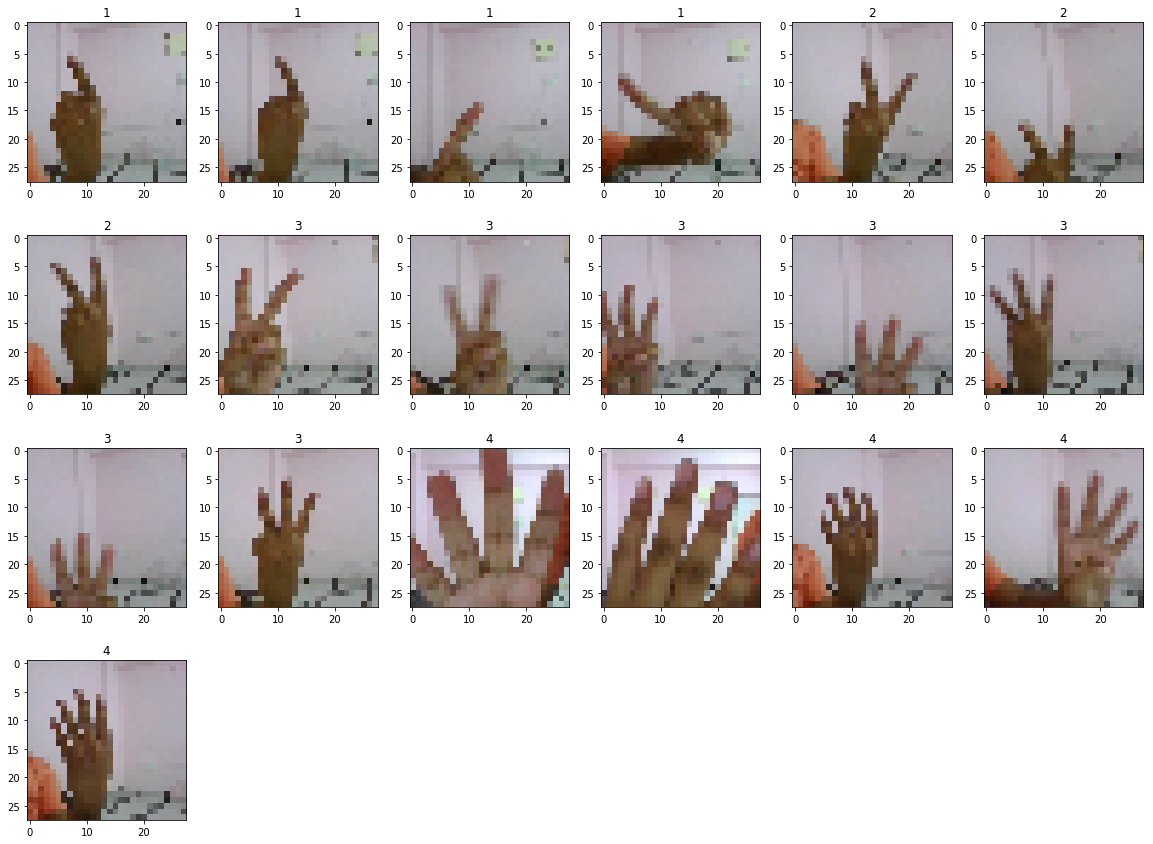

In [16]:
plt.rcParams["figure.figsize"] = (20, 15) # (w, h)
test_generator.reset()
for i in range(0,19):
    x = test_generator.next()
    plt.subplot(4,6,i+1)
    plt.imshow(x[0,:,:,:]/255.)
    plt.title(predictions[i])
plt.show()

In [18]:
from keras.preprocessing import image as image_keras

#testing the model
pred= image_keras.load_img('data/test/test/1_1.jpg', target_size=(img_width,img_height))
pred=image_keras.img_to_array(pred)
pred= np.expand_dims(pred, axis=0)
result= model.predict(pred)[0]
classes = validation_generator.class_indices
predicted_class = None
for (c,i) in classes.items():
    if(result[i] == 1):
        predicted_class = c
        break
print('Model predicted ' + str(predicted_class))

Model predicted 1
